# Modelo de prediccion

##### Integrantes: 
##### - Harold Aquino Curisinche 
##### - Rosa Estrada Estrada
##### Descripción: Modelado predictivo para reclamos de SUSALUD

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import joblib 

## Cargar y preparar los datos

In [6]:
# Cargar dataset procesado
df = pd.read_csv("../data/processed/reclamos_clean_transformed.csv")

# Seleccionar variables relevantes
df = df[["DE_MEDIO_PRESENTACION", "DE_SERVICIO", "DE_CLASIF_1", "DE_ESTADO_RECLAMO", "DE_RESULTADO"]]

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Ver estructura del dataset
print(df.head())


  DE_MEDIO_PRESENTACION DE_SERVICIO  \
0                Físico           -   
1                Físico           -   
2                Físico           -   
3                Físico           -   
4                Físico           -   

                                        DE_CLASIF_1 DE_ESTADO_RECLAMO  \
0  Negar  o demora en otorgar la cobertura en salud          Resuelto   
1                              Cobrar indebidamente          Resuelto   
2                       Otros relativos a las IAFAS         Concluido   
3                       Otros relativos a las IAFAS         Concluido   
4                       Otros relativos a las IAFAS        En trámite   

  DE_RESULTADO  
0    Infundado  
1    Infundado  
2    Infundado  
3    Infundado  
4    Pendiente  


In [7]:
# Codificar variables categóricas con LabelEncoder
encoder = LabelEncoder()
for col in ["DE_MEDIO_PRESENTACION", "DE_SERVICIO", "DE_CLASIF_1", "DE_ESTADO_RECLAMO"]:
    df[col] = encoder.fit_transform(df[col])

# Ver datos transformados
print(df.head())


   DE_MEDIO_PRESENTACION  DE_SERVICIO  DE_CLASIF_1  DE_ESTADO_RECLAMO  \
0                      0            0            3                  4   
1                      0            0            1                  4   
2                      0            0           17                  2   
3                      0            0           17                  2   
4                      0            0           17                  3   

  DE_RESULTADO  
0    Infundado  
1    Infundado  
2    Infundado  
3    Infundado  
4    Pendiente  


In [8]:
# Definir variables predictoras y variable objetivo
X = df.drop(columns=["DE_RESULTADO"])  # Variables de entrada
y = encoder.fit_transform(df["DE_RESULTADO"])  # Variable a predecir

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (130111, 4)
Tamaño del conjunto de prueba: (32528, 4)


In [10]:
# Crear y entrenar modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Guardar modelo entrenado
joblib.dump(modelo, "../modelos/reclamos_model.pkl")

# Predicción en datos de prueba
y_pred = modelo.predict(X_test)


Precisión del modelo: 0.83

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       658
           1       0.40      0.01      0.02       333
           2       0.50      0.71      0.59      4616
           3       0.00      0.00      0.00       960
           4       0.60      0.17      0.26       856
           5       0.58      0.57      0.57      5000
           6       1.00      1.00      1.00     20105

    accuracy                           0.83     32528
   macro avg       0.58      0.49      0.49     32528
weighted avg       0.82      0.83      0.82     32528



c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


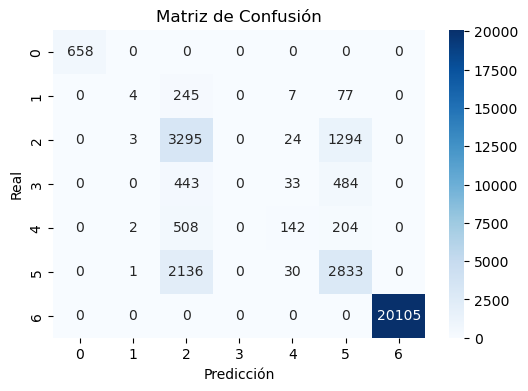

In [ ]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Reporte de clasificación
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()